In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
# Hyperparameters
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28 * 28

In [3]:
# Has no Y because it is unsupervised learning.
X = tf.placeholder(tf.float32, [None, n_input])

In [4]:
# Encoder
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(
        tf.add(tf.matmul(X, W_encode), b_encode))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# Decoder
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(
        tf.add(tf.matmul(encoder, W_decode), b_decode))

In [6]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))

In [7]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        total_cost += cost_val
        
    print('Epoch:', '%04d' %(epoch + 1),
          'Avg. cost = ', '{:.4f}'.format(total_cost / total_batch))
    
print('Optimization finished')

Epoch: 0001 Avg. cost =  0.1994
Epoch: 0002 Avg. cost =  0.0567
Epoch: 0003 Avg. cost =  0.0455
Epoch: 0004 Avg. cost =  0.0404
Epoch: 0005 Avg. cost =  0.0366
Epoch: 0006 Avg. cost =  0.0346
Epoch: 0007 Avg. cost =  0.0334
Epoch: 0008 Avg. cost =  0.0325
Epoch: 0009 Avg. cost =  0.0316
Epoch: 0010 Avg. cost =  0.0311
Epoch: 0011 Avg. cost =  0.0307
Epoch: 0012 Avg. cost =  0.0303
Epoch: 0013 Avg. cost =  0.0298
Epoch: 0014 Avg. cost =  0.0294
Epoch: 0015 Avg. cost =  0.0291
Epoch: 0016 Avg. cost =  0.0288
Epoch: 0017 Avg. cost =  0.0285
Epoch: 0018 Avg. cost =  0.0284
Epoch: 0019 Avg. cost =  0.0281
Epoch: 0020 Avg. cost =  0.0280
Optimization finished


In [9]:
sample_size = 10

samples = sess.run(decoder,
                   feed_dict = {X: mnist.test.images[:sample_size]})

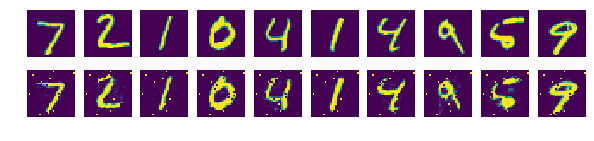

In [11]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
    
plt.show()